<a href="https://colab.research.google.com/github/arushi290805/iris_classification_simple_nn/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.nn.functional as F

In [4]:
# Create a model that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden Layer1 (number of neurons) --> H2 (n) --> output (3 classes of iris flower)
  def __init__(self, in_features = 4, h1 = 8,h2=9,out_features = 3):

    super().__init__() # Call the parent class's __init__ method
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [5]:
#pick a random seed for initialization
torch.manual_seed(50)
#create an instance of model
model=Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [8]:
my_df = pd.read_csv('iris.csv')
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
my_df['species'] = my_df['species'].replace('setosa',0)
my_df['species'] = my_df['species'].replace('versicolor',1)
my_df['species'] = my_df['species'].replace('virginica',2)
my_df

/tmp/ipython-input-3150590999.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
 #TrainTesstSplit
 x = my_df.drop('species',axis=1)
 y = my_df['species']

In [11]:
import numpy as np


In [12]:
x=x.values
y=y.values

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [16]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
#ERROR
criterion = nn.CrossEntropyLoss()
#choose adam optimizor
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [19]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)

  #measure the loss/error
  loss = criterion(y_pred,y_train)

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  #do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss: 1.1180381774902344
epoch: 10 and loss: 0.8943429589271545
epoch: 20 and loss: 0.6040202379226685
epoch: 30 and loss: 0.40940600633621216
epoch: 40 and loss: 0.2175273597240448
epoch: 50 and loss: 0.10402797162532806
epoch: 60 and loss: 0.06580645591020584
epoch: 70 and loss: 0.056412529200315475
epoch: 80 and loss: 0.05334649607539177
epoch: 90 and loss: 0.051764436066150665


Text(0.5, 0, 'epoch')

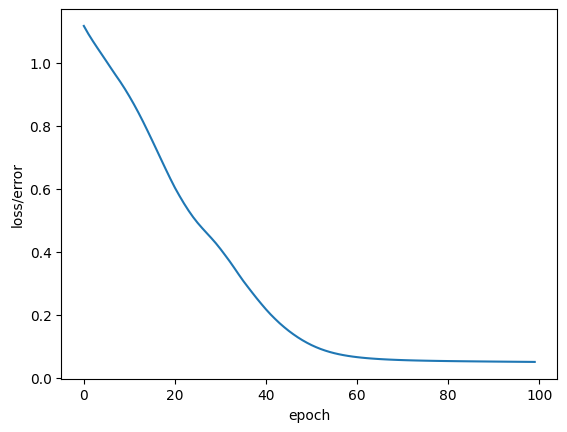

In [20]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")